




<h1 style="font-size: 50px; color: Living Coral;text-align: center;
">SALES PREDICTION</h1>





<img src="sa.jpg" width="1000" height="800">






<h1 align='center' style="color:black">Load Needed Dependencies
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split,cross_val_score
import regex as re
import klib as k


<h1 align='center' style="font-size: 20px;">Import The Dataset </h1>

In [2]:
data=pd.read_csv('advertising.csv')
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6




<h1 align='center' style="font-size: 20px;">Checking null values and fill if needed </h1>

In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
data.isnull().mean()*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64




<h1 align='center' style="color:LightSalmon"> EXPLORATORY DATA ANALYSIS </h1>




<h1 align='center' style="font-size: 20px;">HISTOGRAM </h1>

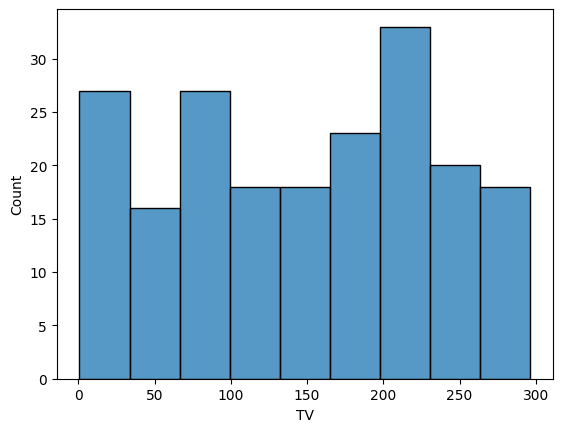

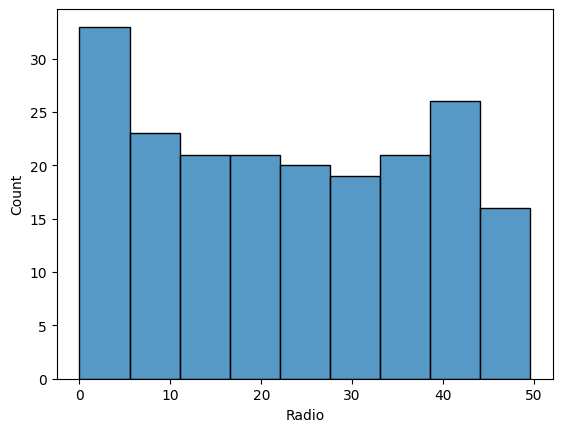

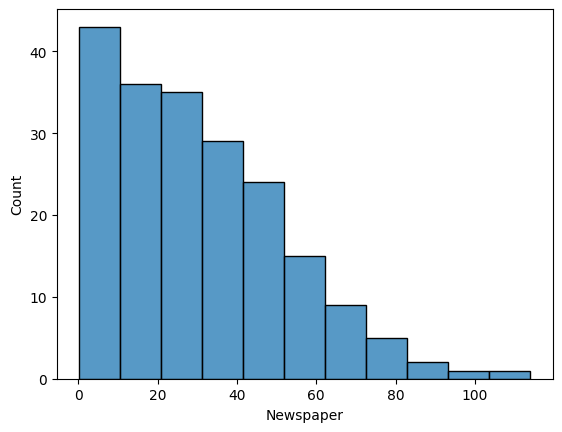

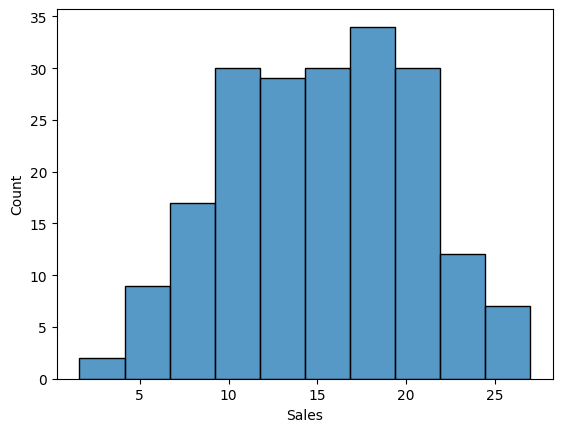

In [5]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(data[i])
        plt.show()


<h1 align='center' style="font-size: 20px;">KDE PLOT </h1>

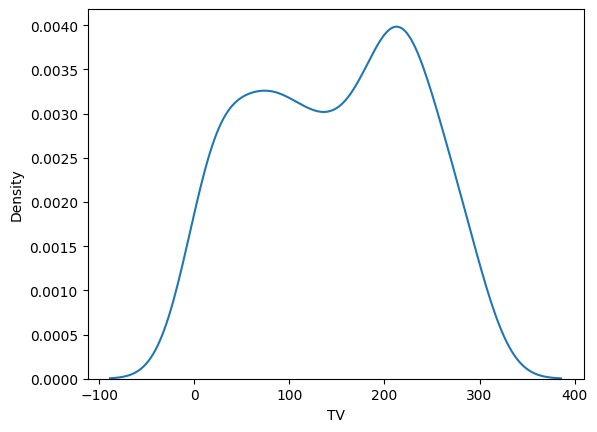

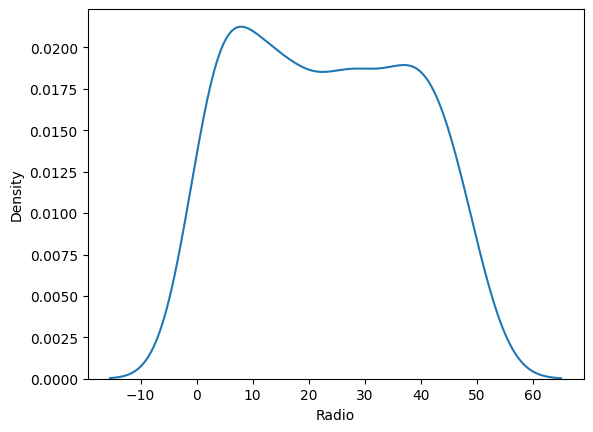

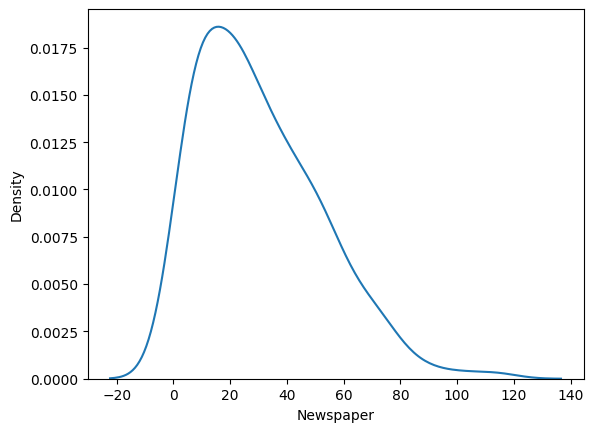

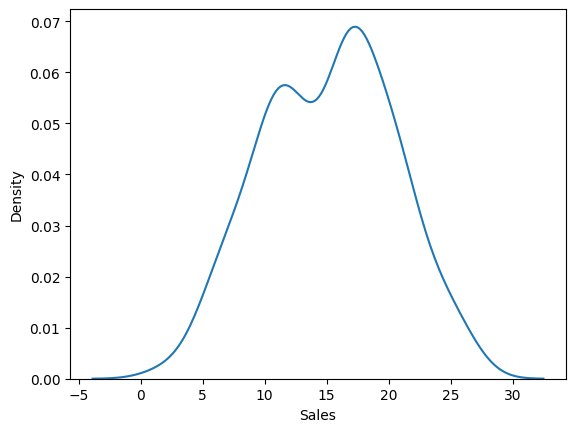

In [6]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.kdeplot(data[i])
        plt.show()



<h1 align='center' style="font-size: 20px;">Checking  Outlier </h1>

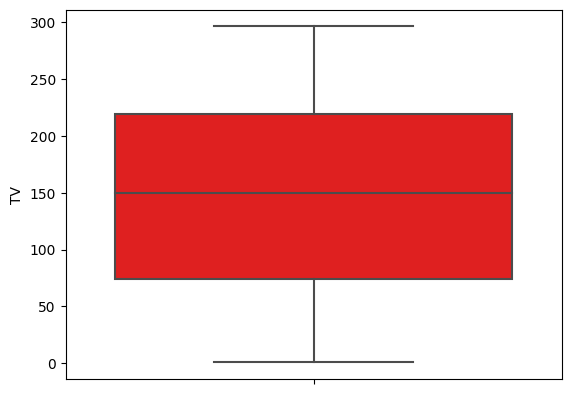

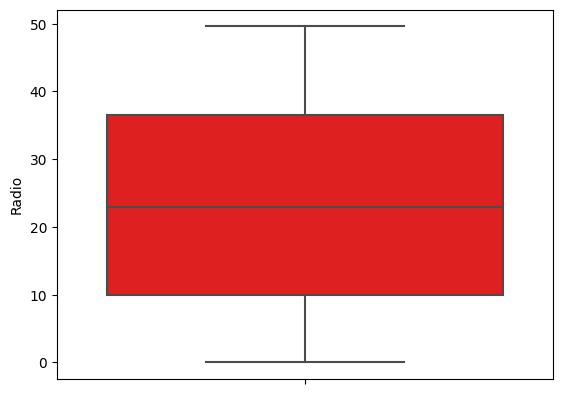

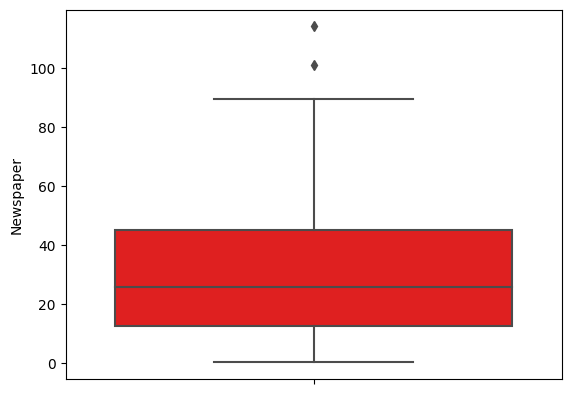

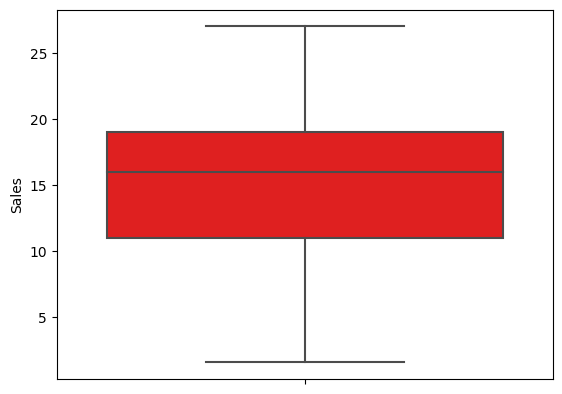

In [13]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i], color="red")
        plt.show();

<h1 align='center' style="color:LightSalmn">BIVARIATE ANALYSIS
</h1>


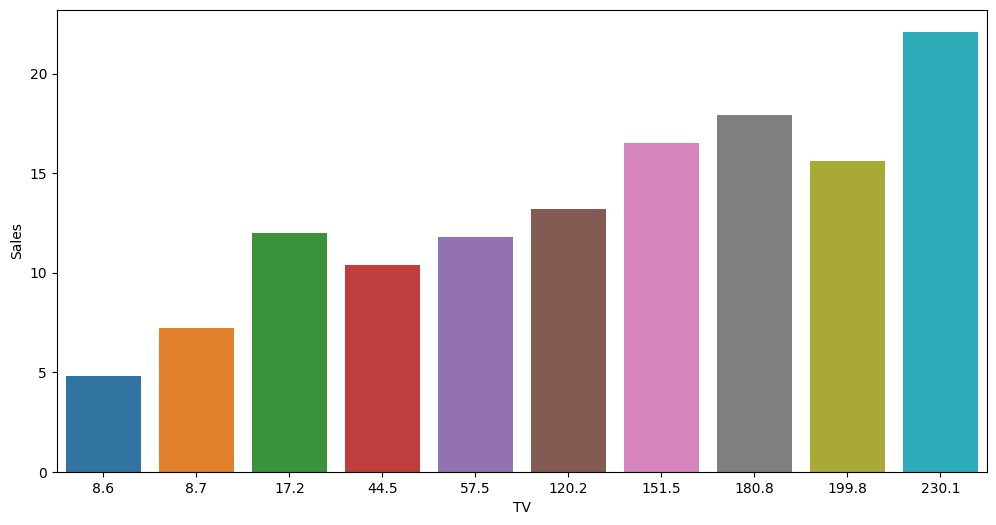

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='TV',y='Sales',data=data [:10]);


<h1 align='center' style="font-size: 20px;">Setting the outlier limits </h1>

In [15]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [16]:
for i in data.columns:
    if data[i].dtypes != "object":
        UL,LL = outlier_limit(data[i])
        data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

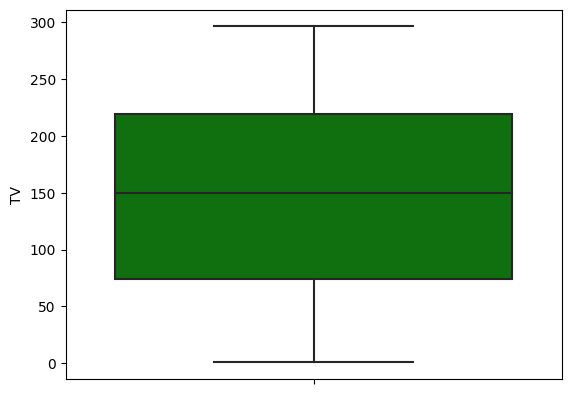

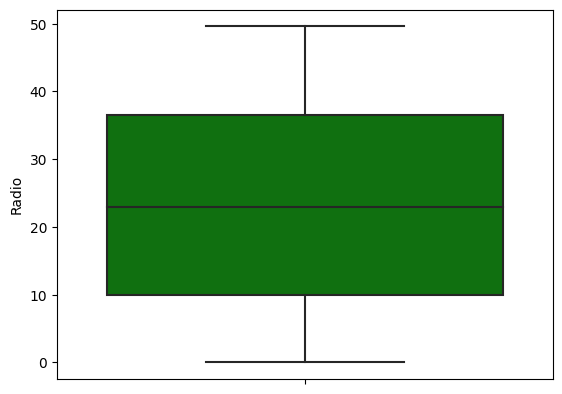

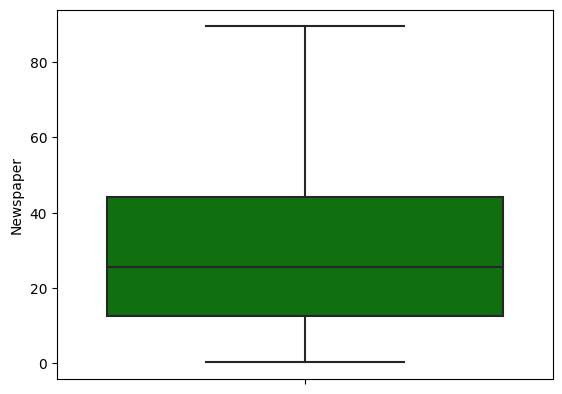

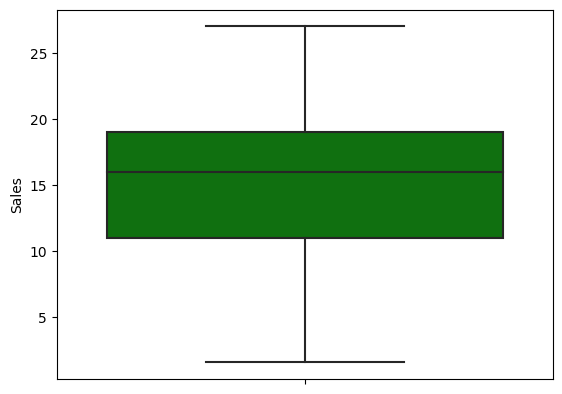

In [17]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i], color="green")
        plt.show()

#### After outlier setting have to ensure that no more Nan values in the data beacuse if any null values in data will effect model fitting

In [18]:
data.dropna(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


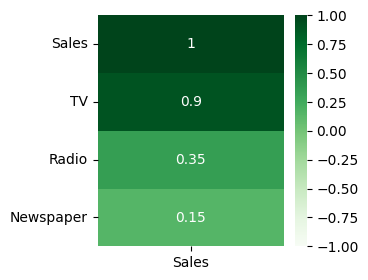

In [20]:
plt.figure(figsize=(3,3))
sns.heatmap(data.corr()[['Sales']].sort_values(by="Sales",ascending = False),vmin=-1,vmax=1,annot= True,cmap="Greens")
plt.show()

In [19]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
x=data[['Newspaper','TV']].values

In [22]:
y=data[["Sales"]].values




<h1 align='center' style="color:LightSalmon">Model building  using cross validation
</h1>

In [23]:
models = {
    "LinearRegression" : LinearRegression(),
    'LinearSVR' : LinearSVR(),
    'Ridge'   : Ridge(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'RandomForestRegressor' : RandomForestRegressor()
    }

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2.2252925092518288
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  2.638570580450917
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2.2252923508184663
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3.0609916799666634
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2.2876159283217805
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2.2734905292958616
*******************************************




<h1 align='center' style="color:olive"> LINEAR REGRESSION HAS LOWEST RMSE VALUE
</h1>


<h1 align='center' style="font-size: 20px;"> FEATURE SCALING </h1>

In [25]:
sc=StandardScaler()
x=sc.fit_transform(x)


<h1 align='center' style="font-size: 20px;"> Splitting into training and testing </h1>

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



<h1 align='center' style="font-size: 20px;"> FITTING THE MODEL </h1>

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()


<h1 align='center' style="font-size: 20px;"> Training Score </h1>

In [29]:
training_score=model.score(x_train,y_train)*100
training_score

81.69926721432174


<h1 align='center' style="font-size: 20px;"> Testing Score </h1>

In [30]:
testing_score=model.score(x_test,y_test)*100
testing_score

83.00122015541199


<h1 align='center' style="color:LightSalmon">PREDICTION
</h1>

In [31]:
y_pred =model.predict(x)
y_pred

array([[20.97494761],
       [10.02608922],
       [ 9.42262452],
       [16.32027576],
       [17.90701453],
       [ 9.16813803],
       [ 9.9477351 ],
       [12.91910075],
       [ 6.47685864],
       [17.58812657],
       [10.43993933],
       [17.77260141],
       [ 9.65746049],
       [11.52727313],
       [18.72164854],
       [18.49986064],
       [23.27309221],
       [10.39406134],
       [14.66227042],
       [19.76642027],
       [19.71248792],
       [ 8.49049217],
       [19.3165483 ],
       [10.01953774],
       [20.95141569],
       [14.18752439],
       [19.83726346],
       [20.30948886],
       [11.28669567],
       [23.43997753],
       [13.5028385 ],
       [12.33852213],
       [20.40109882],
       [11.43683038],
       [22.06111762],
       [20.6422491 ],
       [11.6870856 ],
       [ 9.58714602],
       [19.51077735],
       [18.1121503 ],
       [16.98573793],
       [21.97534764],
       [18.16224143],
       [ 8.90774934],
       [16.62128215],
       [12

In [35]:
output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
output

,ACTUAL,PREDICTED
0,22.1,20.974948
1,10.4,10.026089
2,12.0,9.422625
3,16.5,16.320276
4,17.9,17.907015
...,...,...
193,7.6,8.548090
194,14.0,11.380819
195,14.8,15.813400
196,25.5,23.769977


<h1 align='center' style="color:LightSalmon">VISUALIZATION
</h1>


<h1 align='center' style="font-size: 20px;"> SCATTER PLOT OF ACTUAL AND PREDICTED </h1>

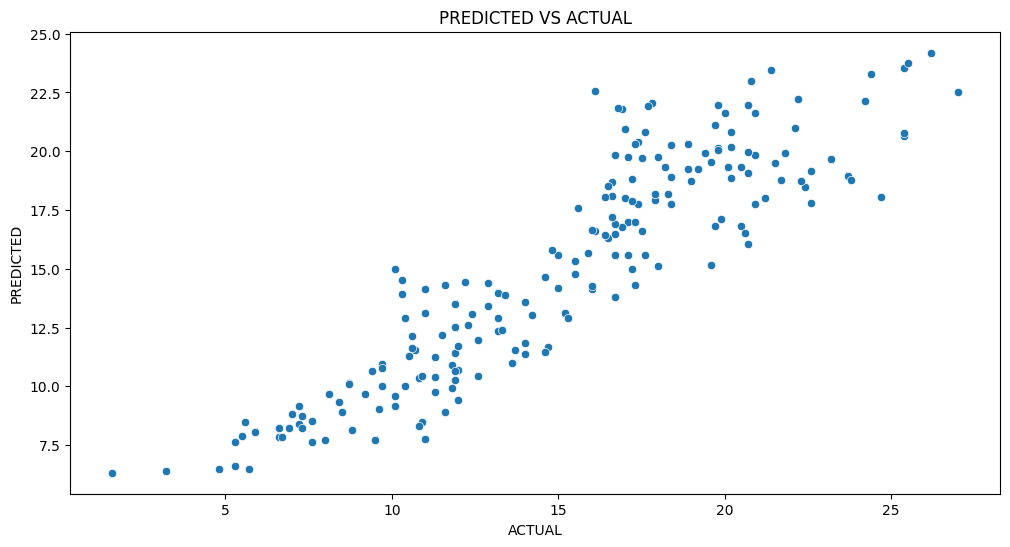

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=out, x="ACTUAL", y = "PREDICTED");